In [1]:
from __future__ import division

from matplotlib import pyplot as plt
from collections import Counter
import random
import math

# 自定义模块
import linear_algebra as la

# 6. 概率
本章粗略地讲解一下概率论。我们把概率论视为对从事件空间中抽取的事件的不确定性进行量化的一种方式。我们暂且不探究术语的技术内涵，而是用掷骰子的例子来理解它们。空间是指所有可能的结果的集合。这些结果的任何一部分就是一个事件，比如，“骰子掷出的点数为1”“骰子掷出的点数是偶数”等都是事件。

我们用$P(E)$来标记`事件E的概率`。

## 6.1 不独立和独立
泛泛地讲，如果$E$发生意味着$F$发生（或者$F$发生意味着$E$发生），我们就称事件$E$与事件$F$为不相互独立（dependent）。反之，$E$与$F$就相互独立（independent）。

举个例子，如果两次掷起一枚均匀的硬币，那么我们无法根据第一次掷硬币的结果是否是正面朝上来判断第二次的结果是否正面朝上。第一次掷硬币的结果和第二次掷硬币的结果，这两个事件就是独立的。相反，如果第一次掷硬币的结果是正面朝上，那么我们能很明显能判断出两次掷硬币是否都是反面朝上。（如果第一次掷硬币的结果是正面朝上，那么很明显两次掷硬币的结果不可能都是反面朝上。）因此，第一次结果正面朝上和两次结果不可能都是反面朝上，这两个事件就是不独立的。

从数学的角度来说，事件$E$和事件$F$独立意味着两个事件同时发生的概率等于它们分别发生的概率的乘积：
+ $P(E, F) = P(E)P(F)$

## 6.2 条件概率
如果事件$E$与事件$F$独立，那么定义式如下：
+ $P(E, F) = P(E)P(F)$

如果两者不一定独立（并且$F$的概率不为零），那么$E$关于$F$的条件概率式如下：
+ $P(E|F)= \frac{P(E, F)}{P(F)}$

条件概率可以理解为，已知$F$发生的前提下，$E$发生的概率。

更常用的公式是上式的变形：
+ $P(E, F) = P(E|F)P(F)$

如果$E$和$F$独立，则：
+ $P(E|F) = P(E)$

这个数学公式意味着，$F$是否发生并不会影响$E$是否发生的概率。

举一个常见的关于一个有两个孩子（性别未知）的家庭的有趣例子。如果我们假设：
1. 每个孩子是男孩和是女孩的概率相同
2. 第二个孩子的性别概率与第一个孩子的性别概率独立

那么，事件`没有女孩`的概率是$\face{1}{4}$，事件`一个男孩、一个女孩`的概率是$\face{1}{2}$，事件`两个女孩`的概率是$\frac{1}{4}$。

现在，我们的问题是，事件$B$`两个孩子都是女孩`关于事件$G$`大孩子是女孩`的条件概率是多少？用条件概率的定义式进行计算如下：
+ $P(B|G) = \frac{P(B,G)}{P(G)} = \frac{P(B)}{P(G)} = \frac{1}{2}$

事件$B$与$G$的交集（“两个孩子都是女孩 并且 大孩子是女孩”）刚好是事件$B$本身。

这个结果大致上符合你的直觉。

我们接着再问，事件`两个孩子都是女孩`关于事件`至少一个孩子是女孩`（$L$）的条件概率是多少？出乎意料的是，结果异于前问。

与前问相同的是，事件$B$和事件$L$的交集（“两个孩子都是女孩， 并且 至少一个孩子是女孩”）刚好是事件$B$。这意味着：
+ $P(B|L)=\frac{P(B,L)}{P(L)} = \frac{P(B)}{P(L)} = \frac{1}{3}$

我们可以通过`生成`许多家庭来验证这个结论：

In [2]:
def random_kid():
    return random.choice(["boy", "girl"])

both_girls = 0 
older_girl = 0 
either_girl = 0

random.seed(0) 
for _ in range(10000):
    younger = random_kid() 
    older = random_kid() 
    if older == "girl":
        older_girl += 1 
    if older == "girl" and younger == "girl":
        both_girls += 1 
    if older == "girl" or younger == "girl":
        either_girl += 1

print("P(both | older):", both_girls/older_girl)
print("P(both | either): ", both_girls/either_girl)

P(both | older): 0.5007089325501317
P(both | either):  0.3311897106109325


## 6.4 随机变量
随机变量指这样一种变量，其可能的取值有一种联合概率分布。

联合分布对变量实现每种可能值都赋予了概率。通过掷硬币得到的随机变量等于0的概率为0.5，等于1的概率也为0.5。从range(10)中生成随机变量的分布为从0到9之间的每个数值赋予0.1的概率。

我们有时会讨论一个随机变量的`期望值`，表示这个随机变量可能值的概率加权值。掷硬币随机变量的期望值为$\frac{1}{2}$(即$0*\frac{1}{2}+1*\frac{1}{2}$)，而`range(10)`随机变量的期望值为4.5。

随机变量也可以基于某些条件事件产生，就像其他事件一样。回忆`6.2节`条件概率中提到的双生子例子：如果$X$是表示女孩个数的随机变量，那么$X$等于0的概率为$\frac{1}{4}$，等于1的概率为$\frac{1}{2}$，等于2的概率为$\frac{1}{4}$。

在已知至少一个孩子是女孩后，接着再定义一个新的随机变量$Y$，表示基于这个条件的女孩的个数。$Y$等于1的概率为$\frac{2}{3}$，等于2的概率为$\frac{1}{3}$。还定义另一个新的随机变量$Z$，表示基于大孩子是女孩的条件之上的女孩的个数，$Z$等于1的概率为$\frac{1}{2}$，等于2的概率为$\frac{1}{2}$。

大部分情况下，我们会隐式使用随机变量的概念，即在使用时，并没有对此加以特别关注。如果仔细思考，可以看出其中的端倪。

## 6.5 连续分布
掷硬币对应的是`离散分布`(discrete distribution)，对离散的结果赋予正概率。我们常常希望对连续结果的分布进行建模。(对于我们的研究目的来说，这些结果最好都是实数，但实际中并不总是这样的)。例如，`均匀分布`（uniform distribution）函数对0到1之间的所有值都赋予相同的`权重`（weight）。

因为0和1之间有无数个数字，因而对每个点而言，赋予的权重几乎是零。因此，我们用带`概率密度函数`（probability density function，pdf）的连续分布来表示概率，一个变量位于某个区间的概率等于概率密度函数在这个区间上的积分。

> 如果积分运算不直观，有一种更简单的理解方式：一个分布的密度函数为$f$，如果$h$很小，则变量的值落在$x$与$x+h$之间的概率接近$h*f(x)$。

均匀分布的密度函数如下：

In [3]:
def uniform_pdf(x):
    return 1 if x >= 0 and x < 1 else 0

如你预期的，一个服从均匀分布的随机变量落在0.2和0.3之间的概率为$\frac{1}{10}$。 在Python中，`random.random()`是按均匀分布生成的伪随机数的函数。

我们还常常对`累积分布函数`（cumulative distribution function，cdf）感兴趣，这个函数给出了一个随机变量小于等于某一特定值的概率。生成均匀分布的累积分布函数不难（`图6-1`）：

<img src="images/06_01.png" style="width:400px;"/>

In [4]:
def uniform_cdf(x):
    "returns the probability that a uniform random variable is <= x" 
    if x < 0: return 0 # uniform random is never less than 0 
    elif x < 1: return x # e.g. P(X <= 0.4) = 0.4 
    else: return 1 # uniform random is always less than 1

## 6.6 正态分布
正态分布是分布之王！它是典型的钟型曲线形态分布函数，可以完全由两个参数决定：均值$\mu$和标准差$\sigma$。`均值`描述钟型曲线的中心，`标准差`描述曲线有多`宽`。正态分布的分布函数如下：
+ $\displaystyle f(x|\mu, \sigma) = \frac{1}{\sqrt{2\pi}\sigma}e^{-\frac{(x-\mu)^2}{2\sigma^2}}$

我们可以这样实现：

In [5]:
def normal_pdf(x, mu=0, sigma=1):
    sqrt_two_pi = math.sqrt(2 * math.pi) 
    return (math.exp(-(x-mu) ** 2 / 2 / sigma ** 2) / (sqrt_two_pi * sigma))

我们绘出了这些概率密度函数，来看看它们的形状如何：

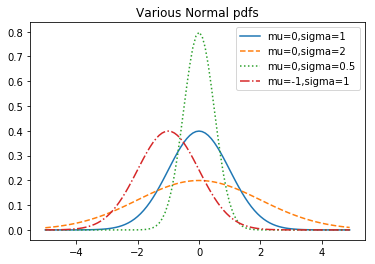

In [6]:
xs = [x / 10.0 for x in range(-50, 50)] 
plt.plot(xs,[normal_pdf(x,sigma=1) for x in xs],'-',label='mu=0,sigma=1') 
plt.plot(xs,[normal_pdf(x,sigma=2) for x in xs],'--',label='mu=0,sigma=2') 
plt.plot(xs,[normal_pdf(x,sigma=0.5) for x in xs],':',label='mu=0,sigma=0.5') 
plt.plot(xs,[normal_pdf(x,mu=-1) for x in xs],'-.',label='mu=-1,sigma=1') 
plt.legend() 
plt.title("Various Normal pdfs") 
plt.show()

如果$\mu=0$并且$\sigma=1$， 这个分布称为`标准正态分布`。 如果$Z$是服从标准正态分布的随机变量，则有如下转换式：
+ $X = \sigma Z + \mu$

其中$X$也是正态分布，但均值是$\mu$，标准差是$\sigma$。相反，如果$X$是均值为$\mu$标准差为$sigma$的正态分布，那么：
+ $Z=\frac{(X-\mu)}{\sigma}$

是标准正态分布的随机变量。

标准正态分布的`累积分布函数`无法用`基本`的解析形式表示，但在Python中可以用函数`math.erf`描述：

In [7]:
def normal_cdf(x, mu=0,sigma=1):
    return (1 + math.erf((x - mu) / math.sqrt(2) / sigma)) / 2

绘出一系列概率累积分布函数：

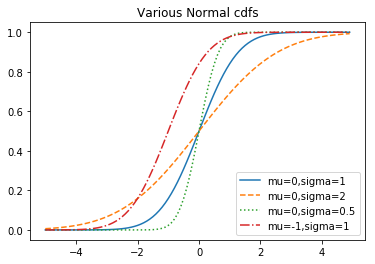

In [8]:
xs = [x / 10.0 for x in range(-50, 50)] 
plt.plot(xs,[normal_cdf(x,sigma=1) for x in xs],'-',label='mu=0,sigma=1') 
plt.plot(xs,[normal_cdf(x,sigma=2) for x in xs],'--',label='mu=0,sigma=2') 
plt.plot(xs,[normal_cdf(x,sigma=0.5) for x in xs],':',label='mu=0,sigma=0.5') 
plt.plot(xs,[normal_cdf(x,mu=-1) for x in xs],'-.',label='mu=-1,sigma=1') 
plt.legend(loc=4) # bottom right 
plt.title("Various Normal cdfs") 
plt.show()

我们有时会需要对`normal_cdf`取逆，从而可以求出特定的概率的相应值。不存在计算逆函数的简便方法，但由于`normal_cdf`连续且严格递增，因而我们可以使用[二分查找](https://en.wikipedia.org/wiki/Binary_search_algorithm)的方法：

In [9]:
def inverse_normal_cdf(p, mu=0, sigma=1, tolerance=0.00001):
    """find approximate inverse using binary search"""
    # if not standard, compute standard and rescale 
    if mu != 0 or sigma != 1:
        return mu + sigma * inverse_normal_cdf(p, tolerance=tolerance)
    
    low_z, low_p = -10.0, 0 
    hi_z, hi_p = 10.0, 1 
    
    while hi_z - low_z > tolerance:
        mid_z = (low_z + hi_z) / 2 
        mid_p = normal_cdf(mid_z) 
        if mid_p < p:
            # midpoint is still too low, search above it
            low_z, low_p = mid_z, mid_p 
        elif mid_p > p:
            # midpoint is still too high, search below it
            hi_z, hi_p = mid_z, mid_p 
        else:
            break
    return mid_z

这个函数反复分割区间，直到分割到一个足够接近于期望概率的精细的$Z$值。

## 6.7 中心极限定理
正态分布的运用如此广泛，很大程度上归功于`中心极限定理`（central limit theorem）。这个定理说，一个定义为大量独立同分布的随机变量的均值的随机变量本身就是接近于正态分布的。

特别地，如果$x_1, x_2 \cdots, x_n$都是均值为$\mu$、标准差为$\sigma$的随机变量，且$n$很大，那么：
+ $\displaystyle \frac{1}{n}(x_1, x_2, \cdots, x_n)$

近似正态分布，且均值为$\mu$，标准差为$\frac{\sigma}{\sqrt{n}}$。等价于（其实更常用）：
+ $\displaystyle \frac{(x_1+x_2+\cdots,+x_n)-\mu n}{\sigma\sqrt{n}}$

上式近似正态分布，均值为0，标准差为1。

举一个易于理解的验证例子：带有$n$和$p$两个参数的二项式随机变量。一个二项式随机变量$Binonimal(n,p)$是$n$个独立伯努利随机变量$Bernoulli(p)$之和，每个伯努利随机变量等于1的概率是$p$，等于0的概率是$1-p$：

In [10]:
def bernoulli_trial(p):
    return 1 if random.random() < p else 0

def binomial(n, p):
    return sum(bernoulli_trial(p) for _ in range(n))

每个伯努利随机变量$Bernoulli(p)$的均值为$p$，标准差为$\sqrt{p(1-p)}$。根据中心极限定理， 当$n$变得很大，一个二项式随机变量$Binonimal(n,p)$近似于一个正态分布的随机变量，其中均值为$\mu = np$，标准差为$\sigma = \sqrt{np(1-p)}$。如果把两个分布都在图上绘出来，很容易看出相似性：

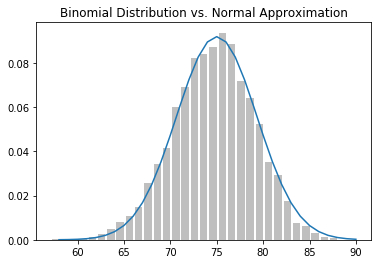

In [11]:
def make_hist(p, n, num_points):
    data = [binomial(n, p) for _ in range(num_points)]
    
    # 用条形图绘出实际的二项式样本 
    histogram = Counter(data) 
    plt.bar([x - 0.4 for x in histogram.keys()], [v / num_points for v in histogram.values()], 0.8, color='0.75')

    mu = p * n 
    sigma = math.sqrt(n * p * (1 - p))

    # 用线形图绘出正态近似 
    xs = range(min(data), max(data) + 1) 
    ys = [normal_cdf(i + 0.5, mu, sigma) - normal_cdf(i - 0.5, mu, sigma) for i in xs] 
    plt.plot(xs,ys) 
    plt.title("Binomial Distribution vs. Normal Approximation") 
    plt.show()

make_hist(0.75, 100, 10000)

近似表达的意义在于，如果你想知道掷起一枚均匀的硬币100次中正面朝上超过60次的概率，那么可以用一个正态分布$Normal(50, 5)$的随机变量大于60的概率来估计。这比计算二项式分布$Binonimal(100, 0.5)$的累积分布函数更容易（尽管在大多数应用中，你可以借助统计软件方便地计算出任何你想要的概率）。